In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# What are derivatives?

In [3]:
def f(x):
    """Random quadratic"""
    return 3*x ** 2 - 4*x + 5

In [4]:
f(3)

20

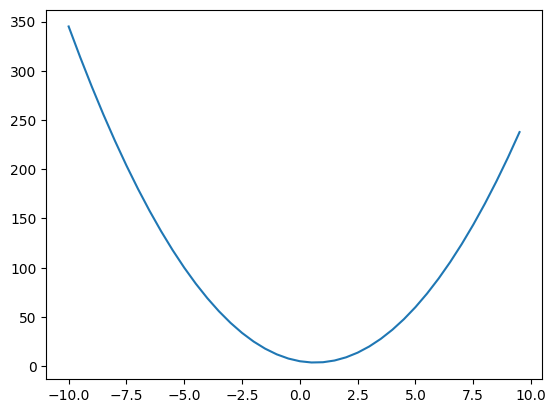

In [6]:
xs = np.arange(-10, 10, 0.5)
ys = f(xs)
plt.plot(xs, ys)

Now let's implement a derivative in code, since the actual expression is too difficult:

In [10]:
h = 10 ** -3
x = 2/3
(f(x + h) - f(x)) / h

0.0029999999995311555

In [11]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [13]:
h = 0.0001

# Random inputs
a = 2.0
b = -3.0
c= 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1) /h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


## Value object

In [24]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        self.data = data
        # Changing this variable doesn't change the loss
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward(): 
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1) / (math.exp (2*n + 1))
        out = Value(t, (self, ), 'tanh')
        def _backward():
            # Local derivative 
            self.grad = (1 - t**2) * out.grad
        
        out._backward = _backward
        return out


this is the alternative, and I do think it feels a bit sharper

In [26]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c
d._op

'+'